# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric"
# url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city
    # city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    #try:
        # Parse the JSON and retrieve data
    try:
        
        city_weather = requests.get(city_url).json()
  


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})                 

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kiunga
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | fort mcmurray
Processing Record 9 of Set 1 | santa elena de uairen
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | hadibu
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | flying fish cove
Processing Record 15 of Set 1 | colonia
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | rosa zarate
Processing Record 18 of Set 1 | petropavlovsk-kamchatsky
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | 

In [6]:
city_data

[{'City': 'kiunga',
  'Lat': -6.1219,
  'Lng': 141.2906,
  'Max Temp': 24.46,
  'Humidity': 82,
  'Cloudiness': 93,
  'Wind Speed': 1.84,
  'Country': 'PG',
  'Date': 1691065263},
 {'City': 'olonkinbyen',
  'Lat': 70.9221,
  'Lng': -8.7187,
  'Max Temp': 2.91,
  'Humidity': 93,
  'Cloudiness': 49,
  'Wind Speed': 5.82,
  'Country': 'SJ',
  'Date': 1691065265},
 {'City': 'san patricio',
  'Lat': 28.017,
  'Lng': -97.5169,
  'Max Temp': 28.91,
  'Humidity': 84,
  'Cloudiness': 1,
  'Wind Speed': 1.65,
  'Country': 'US',
  'Date': 1691065266},
 {'City': 'margaret river',
  'Lat': -33.95,
  'Lng': 115.0667,
  'Max Temp': 11.05,
  'Humidity': 68,
  'Cloudiness': 100,
  'Wind Speed': 2.49,
  'Country': 'AU',
  'Date': 1691065267},
 {'City': 'port elizabeth',
  'Lat': -33.918,
  'Lng': 25.5701,
  'Max Temp': 27.83,
  'Humidity': 34,
  'Cloudiness': 14,
  'Wind Speed': 5.78,
  'Country': 'ZA',
  'Date': 1691065268},
 {'City': 'lihue',
  'Lat': 21.9789,
  'Lng': -159.3672,
  'Max Temp': 26.77,


In [7]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kiunga,-6.1219,141.2906,24.46,82,93,1.84,PG,1691065263
1,olonkinbyen,70.9221,-8.7187,2.91,93,49,5.82,SJ,1691065265
2,san patricio,28.0170,-97.5169,28.91,84,1,1.65,US,1691065266
3,margaret river,-33.9500,115.0667,11.05,68,100,2.49,AU,1691065267
4,port elizabeth,-33.9180,25.5701,27.83,34,14,5.78,ZA,1691065268


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../Starter_code/output_data/cities1.csv", index_label="City_ID")


In [10]:
# Read saved data
city_data_df = pd.read_csv("../Starter_code/output_data/cities1.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kiunga,-6.1219,141.2906,24.46,82,93,1.84,PG,1691065263
1,olonkinbyen,70.9221,-8.7187,2.91,93,49,5.82,SJ,1691065265
2,san patricio,28.0170,-97.5169,28.91,84,1,1.65,US,1691065266
3,margaret river,-33.9500,115.0667,11.05,68,100,2.49,AU,1691065267
4,port elizabeth,-33.9180,25.5701,27.83,34,14,5.78,ZA,1691065268


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

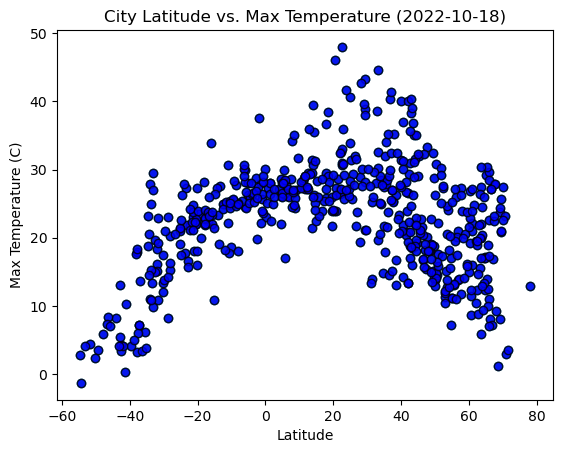

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c="blue", edgecolors="black", alpha=0.8, label="Cities")


# Save the figure
plt.savefig("../Starter_code/output_data/Fig1.1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

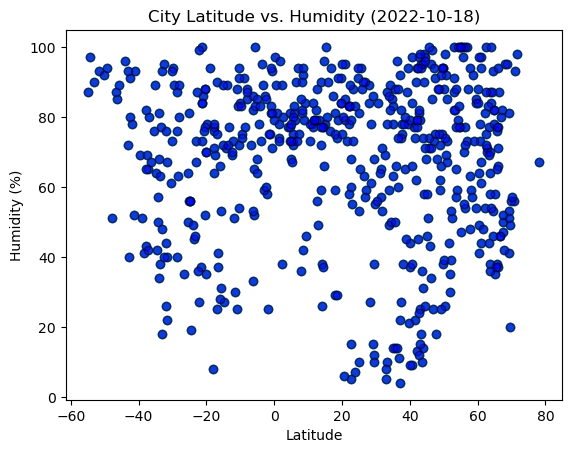

In [12]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c="blue", edgecolors="black", alpha=0.5)

# Save the figure
plt.savefig("../Starter_code/output_data/Fig2.2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

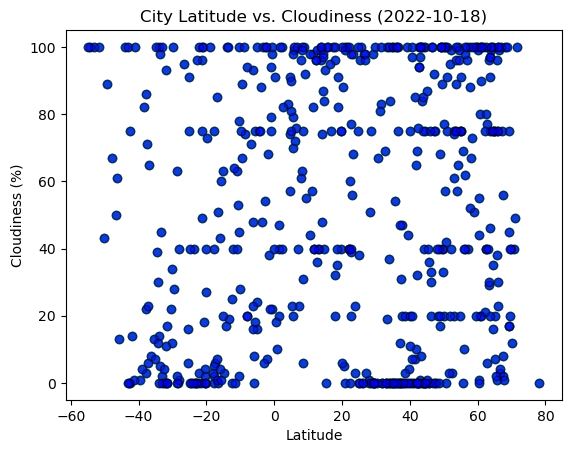

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c="blue", edgecolors="black", alpha=0.5)

# Save the figure
plt.savefig("../Starter_code/output_data/Fig3.3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

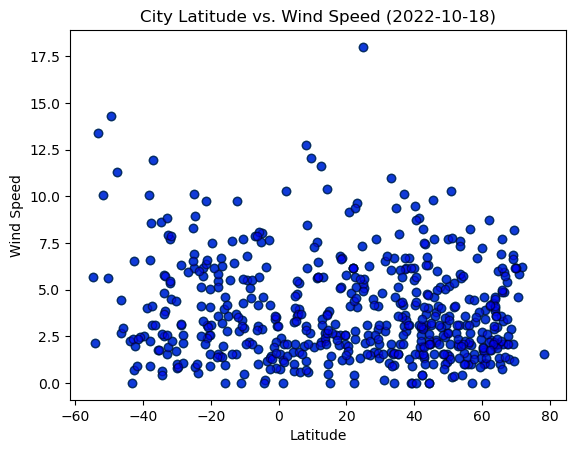

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c="blue", edgecolors="black", alpha=0.5)

# Save the figure
plt.savefig("../Starter_code/output_data/Fig4.4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,2.91,93,49,5.82,SJ,1691065265
2,san patricio,28.0170,-97.5169,28.91,84,1,1.65,US,1691065266
5,lihue,21.9789,-159.3672,26.77,78,40,6.17,US,1691065270
6,fort mcmurray,56.7268,-111.3810,13.77,100,100,1.03,CA,1691065271
7,santa elena de uairen,4.6167,-61.1333,21.98,81,57,0.66,VE,1691065272


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kiunga,-6.1219,141.2906,24.46,82,93,1.84,PG,1691065263
3,margaret river,-33.9500,115.0667,11.05,68,100,2.49,AU,1691065267
4,port elizabeth,-33.9180,25.5701,27.83,34,14,5.78,ZA,1691065268
8,puerto natales,-51.7236,-72.4875,4.34,93,100,10.07,CL,1691064981
11,grytviken,-54.2811,-36.5092,-1.31,97,100,2.13,GS,1691065277


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.49385840393795405


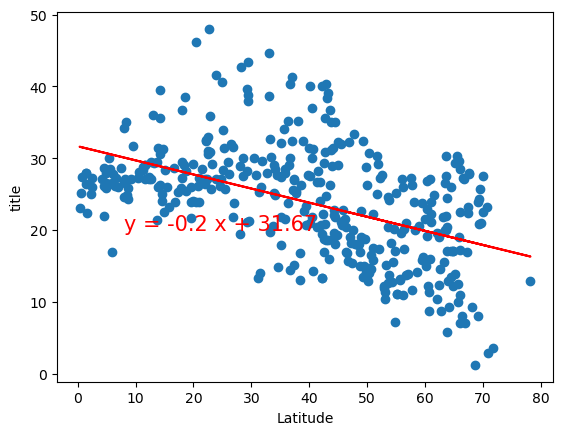

In [28]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (8,20))

The r-squared is: 0.8140752158622396


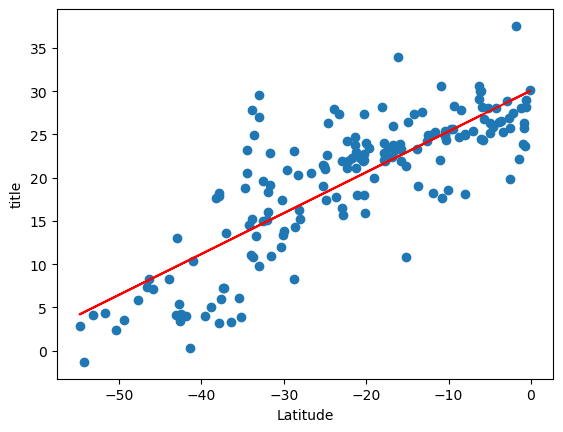

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

**Discussion about the linear relationship:** 

On Northern Hemisphere, it is a Negative Linear Relationship. And, it states Positive Linear Relationship on Southern Hemisphere.

As you move away from the equator towards the poles (in the Northern Hemisphere), you generally experience colder temperatures due to the tilt of the Earth and the changing angle of the sunlight. On the other hand, as you move towards the equator (in the Southern Hemisphere), you generally experience warmer temperatures due to the more direct angle of sunlight.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.06527181713713871


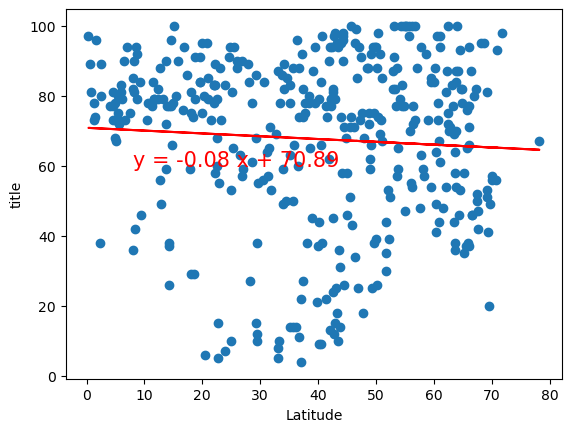

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (8,60))

The r-squared is: 0.024840988510714142


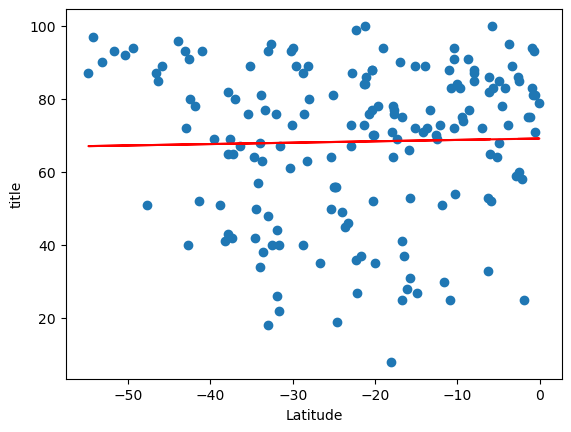

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (6,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.06638475333551141


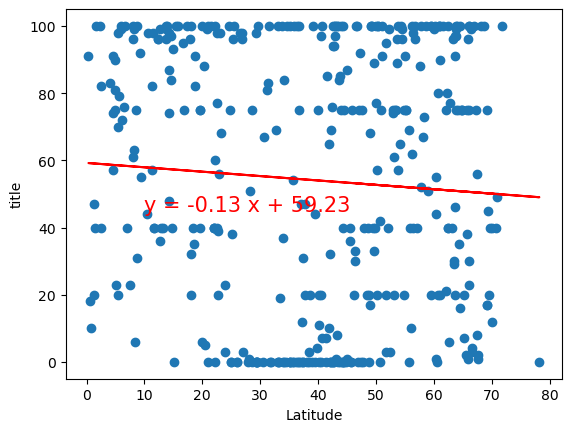

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (10,45))

The r-squared is: 0.06861133914661782


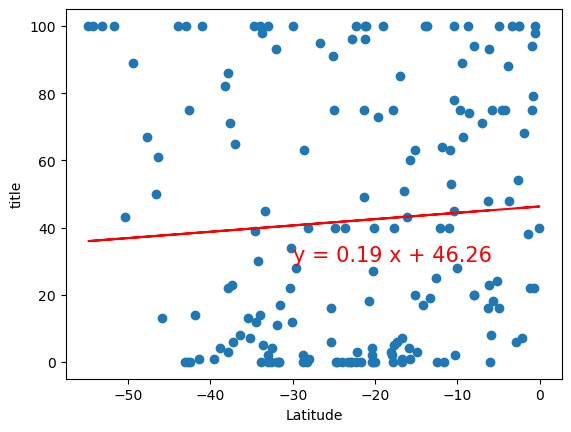

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.050686902208575316


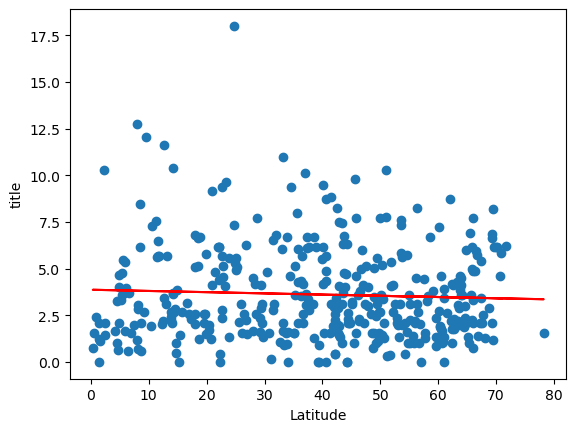

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.1737203043504989


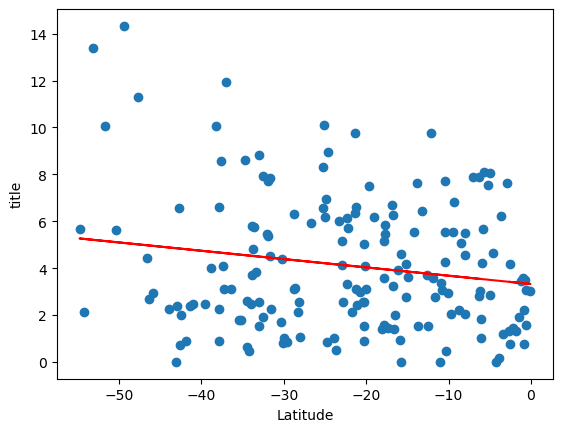

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE